**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [3]:
# Creating linespaces for prices p1 and p2
p1 = np.linspace(0.1,2.0,10)
p2 = np.linspace(0.1,2.0,10)

# Setting wage = 1
w = 1 # Numeraire

# Import Problem1Helper
import Problem1Helper

# Results from market clearing conditions for p1 and p2
information = (prices, script_l1, script_l2, script_l_total, y1, y2, c1, c2) = Problem1Helper.find_market_clearing_conditions_for_p1_p2(p1, p2, w, par)

# Below all of combinations of c1, c2, y1, y2, l1, l2 and l are 
# found from different combinations of p1 and p2

print("Combinations of p1 and p2")
display(prices)

print("Script l 1 values")
display(script_l1)

print("Script l 2 values")
display(script_l2)

print("Script l combined values")
display(script_l_total)

print("Production (y1) values")
display(y1)

print("Production (y2) values")
display(y2)

print("Consumption (c1) values")
display(c1)

print("Consumption (c2) values")
display(c2)

Combinations of p1 and p2


/Users/victorkristensen/Github/projects-2024-Bertil-Nikoline-Victor/examproject/Problem1Helper.py:140: OptimizeWarning: Initial guess is not within the specified bounds
  result = minimize(script_l_to_optimize, x0, args=(par,), method='Powell', bounds=bounds)


[(0.1, 0.1),
 (0.1, 0.3111111111111111),
 (0.1, 0.5222222222222223),
 (0.1, 0.7333333333333333),
 (0.1, 0.9444444444444444),
 (0.1, 1.1555555555555557),
 (0.1, 1.3666666666666667),
 (0.1, 1.577777777777778),
 (0.1, 1.788888888888889),
 (0.1, 2.0),
 (0.3111111111111111, 0.1),
 (0.3111111111111111, 0.3111111111111111),
 (0.3111111111111111, 0.5222222222222223),
 (0.3111111111111111, 0.7333333333333333),
 (0.3111111111111111, 0.9444444444444444),
 (0.3111111111111111, 1.1555555555555557),
 (0.3111111111111111, 1.3666666666666667),
 (0.3111111111111111, 1.577777777777778),
 (0.3111111111111111, 1.788888888888889),
 (0.3111111111111111, 2.0),
 (0.5222222222222223, 0.1),
 (0.5222222222222223, 0.3111111111111111),
 (0.5222222222222223, 0.5222222222222223),
 (0.5222222222222223, 0.7333333333333333),
 (0.5222222222222223, 0.9444444444444444),
 (0.5222222222222223, 1.1555555555555557),
 (0.5222222222222223, 1.3666666666666667),
 (0.5222222222222223, 1.577777777777778),
 (0.5222222222222223, 1.78

Script l 1 values


[0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.0025000000000000005,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.02419753086419753,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.06817901234567902,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.13444444444444442,
 0.22299382716049382,
 0.22299382716049382,
 0.22299382716049382,
 0.22299382716049382,
 0.222993827

Script l 2 values


[0.0025000000000000005,
 0.02419753086419753,
 0.06817901234567902,
 0.13444444444444442,
 0.22299382716049382,
 0.3338271604938272,
 0.46694444444444444,
 0.6223456790123458,
 0.8000308641975309,
 1.0,
 0.0025000000000000005,
 0.02419753086419753,
 0.06817901234567902,
 0.13444444444444442,
 0.22299382716049382,
 0.3338271604938272,
 0.46694444444444444,
 0.6223456790123458,
 0.8000308641975309,
 1.0,
 0.0025000000000000005,
 0.02419753086419753,
 0.06817901234567902,
 0.13444444444444442,
 0.22299382716049382,
 0.3338271604938272,
 0.46694444444444444,
 0.6223456790123458,
 0.8000308641975309,
 1.0,
 0.0025000000000000005,
 0.02419753086419753,
 0.06817901234567902,
 0.13444444444444442,
 0.22299382716049382,
 0.3338271604938272,
 0.46694444444444444,
 0.6223456790123458,
 0.8000308641975309,
 1.0,
 0.0025000000000000005,
 0.02419753086419753,
 0.06817901234567902,
 0.13444444444444442,
 0.22299382716049382,
 0.3338271604938272,
 0.46694444444444444,
 0.6223456790123458,
 0.800030864

Script l combined values


[0.8368410756663017,
 0.7931886659975105,
 0.7602203866770579,
 0.7281045138666704,
 0.6947911905333454,
 0.6601817286603923,
 0.6248656773006295,
 0.5896293300575957,
 0.5552612621118909,
 0.5223150196608441,
 0.8418040147780407,
 0.8036751628202152,
 0.7723092570950496,
 0.7407987236593405,
 0.7077570808436334,
 0.6732841043047195,
 0.6380231971394933,
 0.6027851777958462,
 0.5683256485789164,
 0.535202775431213,
 0.8326562036500205,
 0.7975879061692293,
 0.7676929140638425,
 0.7372592349585625,
 0.7051997522917995,
 0.6716768697356448,
 0.6373345234878478,
 0.6029558385232228,
 0.5692668994105677,
 0.5368063442717091,
 0.8154975829392158,
 0.7828450217919686,
 0.7544646603392208,
 0.7254061130120625,
 0.6947451069867501,
 0.6626637924929826,
 0.6297693793571276,
 0.5967819927569175,
 0.5643932964574514,
 0.5331038422168982,
 0.7922856712508252,
 0.7618325146077428,
 0.735077555302629,
 0.7076368069634069,
 0.6786960469903324,
 0.6484242560941528,
 0.6173832066640247,
 0.586163387827

Production (y1) values


[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.2611111111111111,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.36666666666666664,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.4722222222222222,
 0.5777777777777778,
 0.5777777777777778,
 0.5777777777777778,
 0.5777

Production (y2) values


[0.05,
 0.15555555555555556,
 0.2611111111111111,
 0.36666666666666664,
 0.4722222222222222,
 0.5777777777777778,
 0.6833333333333333,
 0.788888888888889,
 0.8944444444444445,
 1.0,
 0.05,
 0.15555555555555556,
 0.2611111111111111,
 0.36666666666666664,
 0.4722222222222222,
 0.5777777777777778,
 0.6833333333333333,
 0.788888888888889,
 0.8944444444444445,
 1.0,
 0.05,
 0.15555555555555556,
 0.2611111111111111,
 0.36666666666666664,
 0.4722222222222222,
 0.5777777777777778,
 0.6833333333333333,
 0.788888888888889,
 0.8944444444444445,
 1.0,
 0.05,
 0.15555555555555556,
 0.2611111111111111,
 0.36666666666666664,
 0.4722222222222222,
 0.5777777777777778,
 0.6833333333333333,
 0.788888888888889,
 0.8944444444444445,
 1.0,
 0.05,
 0.15555555555555556,
 0.2611111111111111,
 0.36666666666666664,
 0.4722222222222222,
 0.5777777777777778,
 0.6833333333333333,
 0.788888888888889,
 0.8944444444444445,
 1.0,
 0.05,
 0.15555555555555556,
 0.2611111111111111,
 0.36666666666666664,
 0.472222222222222

Consumption (c1) values


[2.5255232269989047,
 2.4596585905851236,
 2.4926981970682105,
 2.5951468749333437,
 2.7608550530815172,
 2.9895266674626577,
 3.2829303652352215,
 3.643425027209824,
 4.073376378928264,
 4.574445058982532,
 0.8374836332978725,
 0.8216391451004456,
 0.8338041645797502,
 0.8673178168619831,
 0.9208431374801702,
 0.9944763386747891,
 1.088837844860702,
 1.2047095166840898,
 1.342819970653479,
 1.5037074382134314,
 0.5189372517422103,
 0.5112561730475713,
 0.519348411625328,
 0.5399326101535004,
 0.572384254862665,
 0.616796641479342,
 0.6735396907979835,
 0.7430632831232697,
 0.8257845308670637,
 0.922012864439776,
 0.3896353748387701,
 0.3851537715411589,
 0.39153604791654995,
 0.4067570462322074,
 0.4304386548784179,
 0.46265538985824034,
 0.5036556551915522,
 0.5537340475419713,
 0.6131735202679472,
 0.6821788445432766,
 0.3232946642012425,
 0.3205134654244203,
 0.32598541952750176,
 0.33831796613347437,
 0.35725246982830167,
 0.3828426068377505,
 0.41526682250896463,
 0.4547126839764

Consumption (c2) values


[5.892887529664111,
 1.8447439429388426,
 1.1137587689028172,
 0.8257285511151549,
 0.6820936013495512,
 0.6036544232376521,
 0.560500306259672,
 0.5388163772634247,
 0.531309962468904,
 0.5336852568812954,
 6.079510819495667,
 1.9171580052343729,
 1.159046923812986,
 0.8585570308330741,
 0.7077853135141701,
 0.6247351358341623,
 0.5783528932051424,
 0.5542794959391586,
 0.5449124518593828,
 0.5457901072033936,
 6.323346511969896,
 2.0024200111029877,
 1.2118129604590986,
 0.8971607512146548,
 0.7384879209796736,
 0.6504041507907163,
 0.600527258191156,
 0.5738681224121027,
 0.562490912329739,
 0.5617448748160858,
 6.667094191685621,
 2.1183457434763735,
 1.2829053484925252,
 0.9490997745418172,
 0.7798535629561925,
 0.685085865751625,
 0.6305932593455206,
 0.6005284740948139,
 0.5865138019954278,
 0.5836419003314699,
 7.124456488879232,
 2.270303713422977,
 1.3756122313394574,
 1.0166625749970568,
 0.8335890962660372,
 0.7301004841937868,
 0.6696036839914199,
 0.6351033966337986,
 0.6

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


In [4]:
import pandas as pd
from IPython.display import display


market_clearing_prices = Problem1Helper.find_equilibrium_prices(information)

(p1, p2, condition1, condition2, condition3) = market_clearing_prices

# Create a DataFrame
df = pd.DataFrame({'p1': p1, 
                   'p2': p2, 
                   'condition1': condition1, 
                   'condition2': condition2, 
                   'condition3': condition3})

# Display the entire DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,p1,p2,condition1,condition2,condition3
0,0.100000,0.100000,2.48,5.84,0.83
1,0.100000,0.311111,2.41,1.69,0.77
2,0.100000,0.522222,2.44,0.85,0.69
3,0.100000,0.733333,2.55,0.46,0.59
4,0.100000,0.944444,2.71,0.21,0.47
5,0.100000,1.155556,2.94,0.03,0.32
6,0.100000,1.366667,3.23,-0.12,0.16
7,0.100000,1.577778,3.59,-0.25,-0.04
8,0.100000,1.788889,4.02,-0.36,-0.25
9,0.100000,2.000000,4.52,-0.47,-0.48


From the above it has not been possible to find a combination of p1 and p2 where the markets end up clearing - something is wrong. 

However the place where the market clearing is closest is at index 46 where condition 1 = -0.06, condition 2 = -0.01 and condition 3 = -0.07.

In [5]:
# The index that looks like it's the closest to a market clearing situation
index = 46

(prices, script_l1, script_l2, script_l_total, y1, y2, c1, c2)


# We set the variables below as the optimal values and use those values 
# in Question 3 to find the optimal tax rate

script_l = script_l_total[index]
p1 = prices[index][0]
p2 = prices[index][1]
y2_optimal = y2[index]

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [6]:
# We set parameter values for c2, p1 and p2 since we're unsure
# if we've found the correct result in question 2
# In this way we still show that we're able to find the optimal
# tau that maximizes SWF given the parameters below


# Values for tau
tau_array = [x / 100 for x in range(101)]

(tau_array, T_array, SWF_array) = Problem1Helper.tau_to_maximize_SWF(tau_array, script_l, y2_optimal, p1, p2, w, par)

# Create a DataFrame
df2 = pd.DataFrame({'tau': tau_array, 
                   'T_tax': T_array, 
                   'utility': SWF_array})

# Display the entire DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)

,tau,T_tax,utility
0,0.00,0.000000,-0.691173
1,0.01,0.006647,-0.691204
2,0.02,0.013199,-0.691297
3,0.03,0.019657,-0.691449
4,0.04,0.026023,-0.691657
5,0.05,0.032299,-0.691920
6,0.06,0.038487,-0.692235
7,0.07,0.044588,-0.692601
8,0.08,0.050606,-0.693015
9,0.09,0.056541,-0.693476


In [7]:
# In the table above it can be seen that the utility is highest when tau = 0
# This describes an economy without taxes

# Finding the largest utility
max_SWF = max(SWF_array)

# Finding the index of the max worker utility
index_max = SWF_array.index(max_SWF)

# Finding the optimal tau
optimal_tau = tau_array[index_max]
optimal_T = T_array[index_max]
optimal_SWF = SWF_array[index_max]

print(f'The optimal tax rate (tau) is {optimal_tau:.5f} which has a T = {optimal_T:.5f} giving a SWF of {optimal_SWF:.5f}.')

The optimal tax rate (tau) is 0.00000 which has a T = 0.00000 giving a SWF of -0.69117.


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [8]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [9]:
import Problem2Helper

# Expected utilities
expected_utilities = [Problem2Helper.expected_utility(par, x) for x in par.v]

for (index, x) in enumerate(expected_utilities):
    print(f'For career choice {index + 1} the expected utility is {x}')

For career choice 1 the expected utility is 1
For career choice 2 the expected utility is 2
For career choice 3 the expected utility is 3


In [10]:
# Average simulated utilities
average_realised_utilities = [Problem2Helper.average_realised_utility(par, x) for x in par.v]

for (index, x) in enumerate(average_realised_utilities):
    print(f'For career choice {index + 1} the expected utility is {x}')

For career choice 1 the expected utility is 0.9613765144483272
For career choice 2 the expected utility is 2.032627442921783
For career choice 3 the expected utility is 2.9621851389545863


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [11]:
# Import random
import random

# Set the seed for reproducibility
random.seed(1998)

# Types of individuals
types_array = range(1, par.N + 1)

def simulate_K_times_for_individual(par, type):
    return [Problem2Helper.simulate_for_individual(par, type) for _ in range(0, par.K)]

results = [simulate_K_times_for_individual(par, type) for type in types_array]

In [12]:
expected_utility_mean = [Problem2Helper.mean_expected_utility(results[index]) for (index, x) in enumerate(results)]
display(expected_utility_mean)

[5.4976082302880265,
 4.528270079021339,
 4.126222294551591,
 3.892593596279654,
 3.769172052895662,
 3.6221020868776903,
 3.525645180822117,
 3.489100659296505,
 3.4033439252210678,
 3.3917932786665164]

In [13]:
realized_utility_mean = [Problem2Helper.mean_realized_utility(results[index]) for (index, x) in enumerate(results)]
display(realized_utility_mean)

[2.1528393555198106,
 2.2939154535803565,
 2.2926434934271596,
 2.42227441039419,
 2.4572840693780202,
 2.470592638726612,
 2.4781240394754365,
 2.509087572880905,
 2.6041064043696327,
 2.574073447766136]

In [14]:
career_distribution = [Problem2Helper.career_distribution(results[index], par) for (index, x) in enumerate(results)]
display(career_distribution)

[[0.232, 0.3162, 0.4518],
 [0.1903, 0.3222, 0.4875],
 [0.1772, 0.3043, 0.5185],
 [0.1469, 0.3063, 0.5468],
 [0.1381, 0.2861, 0.5758],
 [0.1194, 0.2874, 0.5932],
 [0.1114, 0.2805, 0.6081],
 [0.1015, 0.2811, 0.6174],
 [0.0926, 0.2618, 0.6456],
 [0.0781, 0.2595, 0.6624]]

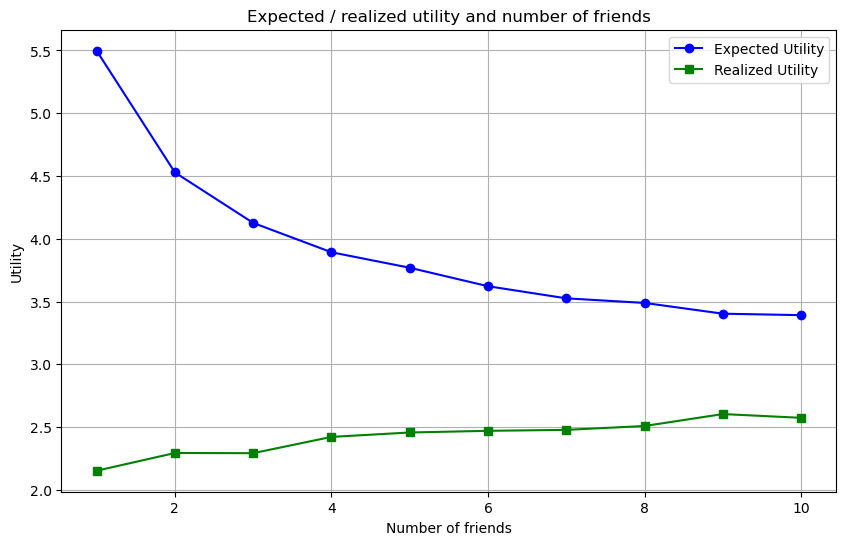

In [15]:
# We visually present the expected utility and the realized utility (y-axis) and 
# the number of friends (x-axis)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(types_array, expected_utility_mean, label='Expected Utility', color='blue', marker='o')
plt.plot(types_array, realized_utility_mean, label='Realized Utility', color='green', marker='s')

plt.xlabel('Number of friends')
plt.ylabel('Utility')
plt.title('Expected / realized utility and number of friends')

plt.legend()
plt.grid(True)
plt.show()

We can see that as the number of friends increase the expected and the realized utility get closer to each other.

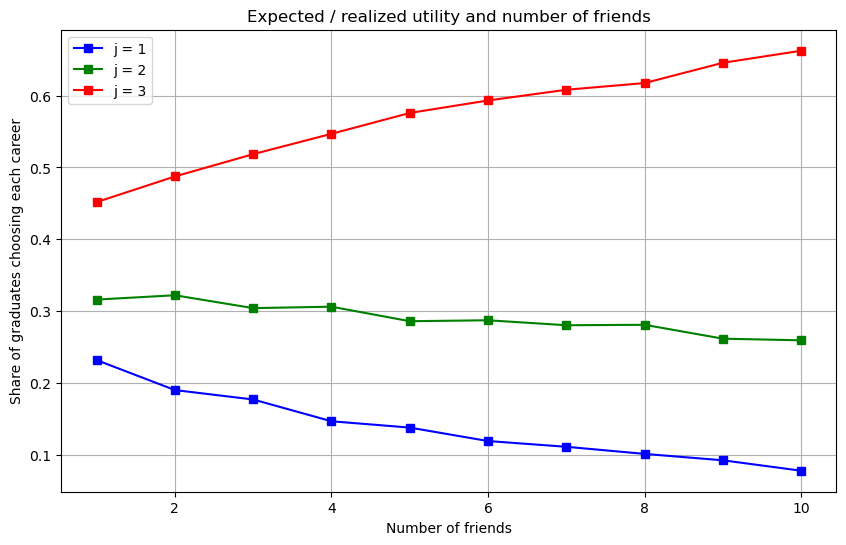

In [16]:
plt.figure(figsize=(10, 6))

type_1_series = [x[0] for x in career_distribution]
type_2_series = [x[1] for x in career_distribution]
type_3_series = [x[2] for x in career_distribution]

plt.plot(types_array, type_1_series, label='j = 1', color='blue', marker='s')
plt.plot(types_array, type_2_series, label='j = 2', color='green', marker='s')
plt.plot(types_array, type_3_series, label='j = 3', color='red', marker='s')

plt.xlabel('Number of friends')
plt.ylabel('Share of graduates choosing each career')
plt.title('Expected / realized utility and number of friends')

plt.legend()
plt.grid(True)
plt.show()

We can see as the number of friends increase the share of graduates working in career j = 3 increase, while the share working in career j=1 and j=2 decrease.

-----


After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [17]:
# We have not solved question 3

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [18]:
import numpy as np

rng = np.random.default_rng(2024)

# Define X and y
X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

# Display X coordinates
display(X)

array([[0.67583134, 0.2143232 ],
       [0.30945203, 0.7994661 ],
       [0.9958021 , 0.14223182],
       [0.07872553, 0.18082381],
       [0.35964689, 0.16961925],
       [0.58875932, 0.61680751],
       [0.10538568, 0.56573105],
       [0.00462964, 0.4651192 ],
       [0.9756222 , 0.79942844],
       [0.59682237, 0.32534966],
       [0.20634391, 0.44272557],
       [0.2780414 , 0.87495784],
       [0.21315735, 0.274245  ],
       [0.80718199, 0.26836533],
       [0.26806287, 0.07088178],
       [0.46720881, 0.26420544],
       [0.88894204, 0.28631831],
       [0.77376693, 0.48724486],
       [0.46801905, 0.96493021],
       [0.89822733, 0.07903432],
       [0.24520427, 0.18478708],
       [0.9054749 , 0.55383204],
       [0.37165898, 0.83389703],
       [0.34877258, 0.68165405],
       [0.22835057, 0.02387229],
       [0.69611898, 0.33685277],
       [0.3419926 , 0.27584087],
       [0.25134374, 0.57010553],
       [0.33385622, 0.42559779],
       [0.20192981, 0.50515967],
       [0.

In [19]:
# Display y coordinates
display(y)

array([0.20901926, 0.37774759])

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In [20]:
import Problem3Helper

A = Problem3Helper.find_x1_x2_triangle(X, y, "A")
B = Problem3Helper.find_x1_x2_triangle(X, y, "B")
C = Problem3Helper.find_x1_x2_triangle(X, y, "C")
D = Problem3Helper.find_x1_x2_triangle(X, y, "D")

# Below the A, B, C and D triangle coordinates are printed
# The first element in the tuple is the smallest value that was
# calculated when finding the optimal x1 and x2
print(A)
print(B)
print(C)
print(D)

(0.2607160525371862, 0.4363584511892198)
(0.21315734573396772, 0.27424500425528053)
(0.10056103098593427, 0.2795177487202619)
(0.20634391138553032, 0.4427255670928353)


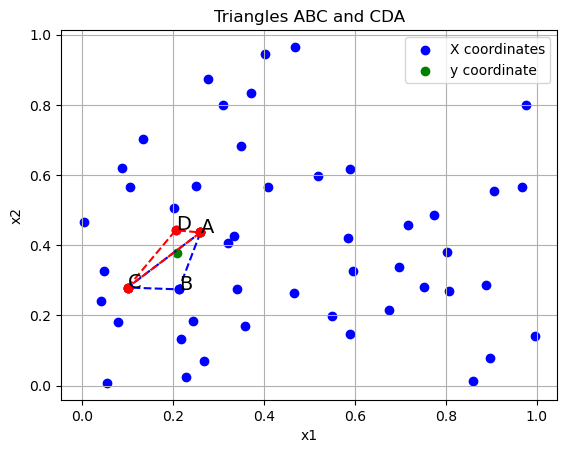

In [21]:
# Below the following have been illustrated
# 1) The A, B, C and D coordinates
# 2) The X and y coordinates
# 3) The ABC and CDA triangle

import matplotlib.pyplot as plt

# Create a list of x and y coordinates for the triangles
ABC_x1_coords = [A[0], B[0], C[0], A[0]]
ABC_x2_coords = [A[1], B[1], C[1], A[1]]

CDA_x1_coords = [C[0], D[0], A[0], C[0]]
CDA_x2_coords = [C[1], D[1], A[1], C[1]]

# Create the plot
plt.figure()
plt.plot(ABC_x1_coords, ABC_x2_coords, marker='o', linestyle='--', color='blue')
plt.plot(CDA_x1_coords, CDA_x2_coords, marker='o', linestyle='--', color='red')

# Annotate the points
plt.text(A[0], A[1], f'A', fontsize = 14)
plt.text(B[0], B[1], f'B', fontsize = 14)
plt.text(C[0], C[1], f'C', fontsize = 14)
plt.text(D[0], D[1], f'D', fontsize = 14)

# Add the X coordinates
X_x1 = [x[0] for x in X]
X_x2 = [x[1] for x in X]
plt.scatter(X_x1, X_x2, marker='o', color='blue', label='X coordinates')

# Add the y coordinate
plt.scatter(y[0], y[1], marker='o', color='green', label='y coordinate')

# Add legend
plt.legend()

# Add grid
plt.grid(True)

# Set the title and labels
plt.title('Triangles ABC and CDA')
plt.xlabel('x1')
plt.ylabel('x2')

# Show the plot
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [22]:
r1_ABC = Problem3Helper.r1_ABC(A, B, C, y)
r2_ABC = Problem3Helper.r2_ABC(A, B, C, y)
r3_ABC = Problem3Helper.r3(r1_ABC, r2_ABC)

print(f'The biometric coordinates for ABC are r1 = {r1_ABC:.5f}, r2 = {r2_ABC:.5f} and r3 = {r3_ABC:.5f}.')

r1_CDA = Problem3Helper.r1_CDA(C, D, A, y)
r2_CDA = Problem3Helper.r2_CDA(C, D, A, y)
r3_CDA = Problem3Helper.r3(r1_CDA, r2_CDA)

print(f'The biometric coordinates for CDA are r1 = {r1_CDA:.5f}, r2 = {r2_CDA:.5f} and r3 = {r3_CDA:.5f}.')

The biometric coordinates for ABC are r1 = 0.62863, r2 = 0.06910 and r3 = 0.30227.
The biometric coordinates for CDA are r1 = 0.36826, r2 = -0.13393 and r3 = 0.76567.


**Conclusion:**

It can be seen from the r1, r2 and r3 values above that since all the values are between 0 and 1 for triangle ABC that is where the coordinate y is located.

--------

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [23]:
F = np.array([Problem3Helper.f(x) for x in X])
print(F)

[1.44846336e-01 2.47396407e-01 1.41634740e-01 1.42354513e-02
 6.10030359e-02 3.63151170e-01 5.96199514e-02 2.15333600e-03
 7.79940130e-01 1.94175951e-01 9.13537252e-02 2.43274503e-01
 5.84573372e-02 2.16619657e-01 1.90007745e-02 1.23439110e-01
 2.54520384e-01 3.77013961e-01 4.51605716e-01 7.09907840e-02
 4.53105809e-02 5.01481015e-01 3.09925321e-01 2.37742241e-01
 5.45125082e-03 2.34489605e-01 9.43355350e-02 1.43292454e-01
 1.42088471e-01 1.02006794e-01 2.46038346e-01 3.80830771e-01
 1.57207931e-02 3.10556613e-01 1.02039817e-02 4.19442735e-04
 1.31093384e-01 1.15786235e-02 3.27286367e-01 8.62372943e-02
 3.04185384e-01 2.31882362e-01 1.13765653e-01 9.47629838e-02
 2.81085930e-02 2.87631340e-02 1.08147430e-01 2.10231860e-01
 5.47033688e-01 5.45655374e-02]


**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [24]:
# First we calculate the approximation of f(y)
approx_f = Problem3Helper.point_inside_ABC(A, B, C, y)

# Then we calculate the real f(y)
real_f = Problem3Helper.f(y)

# Difference between real and approximated value
difference = np.abs(approx_f - real_f)

print(f'Using the algorithm f has been approximated to be {approx_f:.5f}')
print(f'but the real value of f is {real_f:.5f} which is a difference of {difference:.5f}.')

Using the algorithm f has been approximated to be 0.08405
but the real value of f is 0.07896 which is a difference of 0.00510.


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [25]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [26]:
multiple_approx_f_ABC = [Problem3Helper.point_inside_ABC(A, B, C, y) for y in Y]
multiple_approx_f_CDA = [Problem3Helper.point_inside_CDA(C, D, A, y) for y in Y]

print(multiple_approx_f_ABC)
print(multiple_approx_f_CDA)

[None, None, None, None, None]
[None, None, None, None, None]


**Conclusion:** It can be seen from the array of None values that the algorithmn is not able to approximate values for f when the coordinates are outside of the triangle ABC and CDA.